## ITS with CausalImpact model

Interrupted time series analysis with causal impact package. An intervention here is everytime the insulin is non zero, the window size for the data impact is 30 mins either side (can be tuned)


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from causalimpact import CausalImpact
import warnings
import statsmodels.formula.api as smf


In [118]:
warnings.filterwarnings("ignore", message="DataFrame.fillna with 'method' is deprecated", category=FutureWarning)
warnings.filterwarnings("ignore", message="DataFrame.applymap has been deprecated", category=FutureWarning)
warnings.filterwarnings("ignore", message="Series.__getitem__ treating keys as positions is deprecated", category=FutureWarning)
warnings.filterwarnings("ignore", message="No frequency information was provided", category=pd.errors.DtypeWarning)
warnings.filterwarnings("ignore", message="No frequency information was provided", category=UserWarning)
warnings.filterwarnings("ignore", message="Keyword arguments have been passed to the optimizer", category=FutureWarning)
warnings.filterwarnings("ignore", message="Unknown keyword arguments: dict_keys", category=FutureWarning)

In [119]:
data = pd.read_csv("../../synthetic_data/data/ml_dataset.csv", index_col=0)
data.index = pd.to_datetime(data.index)

print("Data Shape:", data.shape)
print("Date Range:", data.index.min(), "to", data.index.max())
print("Columns in dataset:", data.columns.tolist())

Data Shape: (25920, 13)
Date Range: 2024-01-01 00:00:00 to 2024-03-30 23:55:00
Columns in dataset: ['glucose', 'hour', 'day_of_week', 'carbs', 'insulin', 'exercise', 'stress', 'active_insulin', 'carb_impact', 'meal_insulin_delay', 'is_weekend', 'time_since_last_meal', 'time_since_last_insulin']


In [120]:
all_events = data.index[data['insulin'] > 0]
filtered_events = []
last_event = None

for event in all_events:
    if last_event is None or (event - last_event).total_seconds() >= 3600:
        filtered_events.append(event)
        last_event = event

print(f"\nFound {len(filtered_events)} filtered intervention times")


Found 270 filtered intervention times



Processing event 1/10 at 2024-01-01 07:30:00
Window data shape: (16, 13)
                     glucose  hour  carbs  insulin  active_insulin  \
2024-01-01 06:45:00      111     6      0      0.0        0.000000   
2024-01-01 06:50:00      111     6      0      0.0        0.000000   
2024-01-01 06:55:00      111     6      0      0.0        0.000000   
2024-01-01 07:00:00      111     7      0      0.0        0.000000   
2024-01-01 07:05:00      112     7      0      0.0        0.000000   
2024-01-01 07:10:00      112     7      0      0.0        0.000000   
2024-01-01 07:15:00      112     7      0      0.0        0.000000   
2024-01-01 07:20:00      112     7      0      0.0        0.000000   
2024-01-01 07:25:00      112     7      0      0.0        0.000000   
2024-01-01 07:30:00      112     7      0      4.9        0.000000   
2024-01-01 07:35:00      108     7     55      0.0        1.084032   
2024-01-01 07:40:00      110     7      0      0.0        1.142172   
2024-01-01 07:45

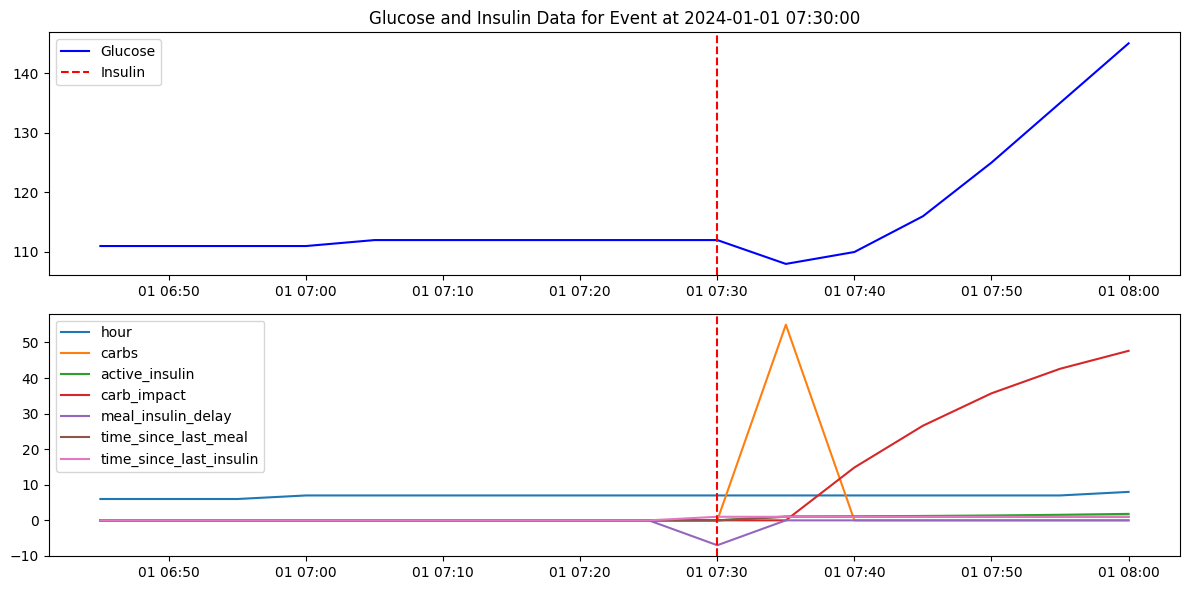

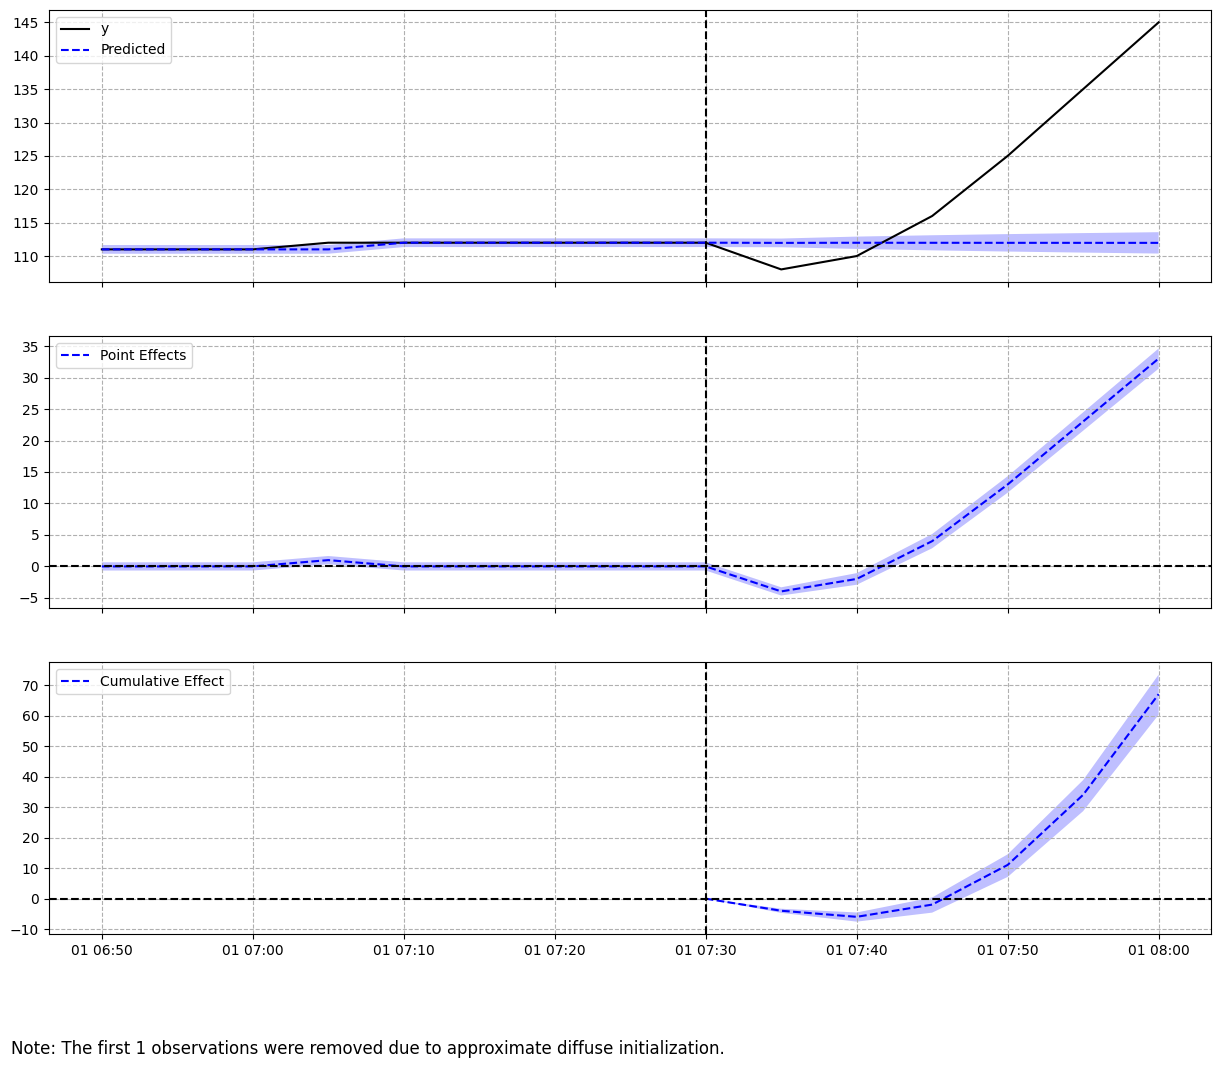

Success: CausalImpact analysis completed for event at 2024-01-01 07:30:00
Average effect: 11.19, Cumulative effect: 67.11

Processing event 2/10 at 2024-01-01 12:05:00
Window data shape: (16, 13)
                     glucose  hour  carbs  insulin  active_insulin  \
2024-01-01 11:20:00       98    11      0      0.0        0.455268   
2024-01-01 11:25:00       96    11      0      0.0        0.447743   
2024-01-01 11:30:00       94    11      0      0.0        0.440342   
2024-01-01 11:35:00       92    11      0      0.0        0.433064   
2024-01-01 11:40:00       90    11      0      0.0        0.425906   
2024-01-01 11:45:00       89    11      0      0.0        0.418867   
2024-01-01 11:50:00       88    11      0      0.0        0.411943   
2024-01-01 11:55:00       87    11      0      0.0        0.405135   
2024-01-01 12:00:00       86    12      0      0.0        0.398438   
2024-01-01 12:05:00       85    12      0      5.6        0.391853   
2024-01-01 12:10:00       79    12

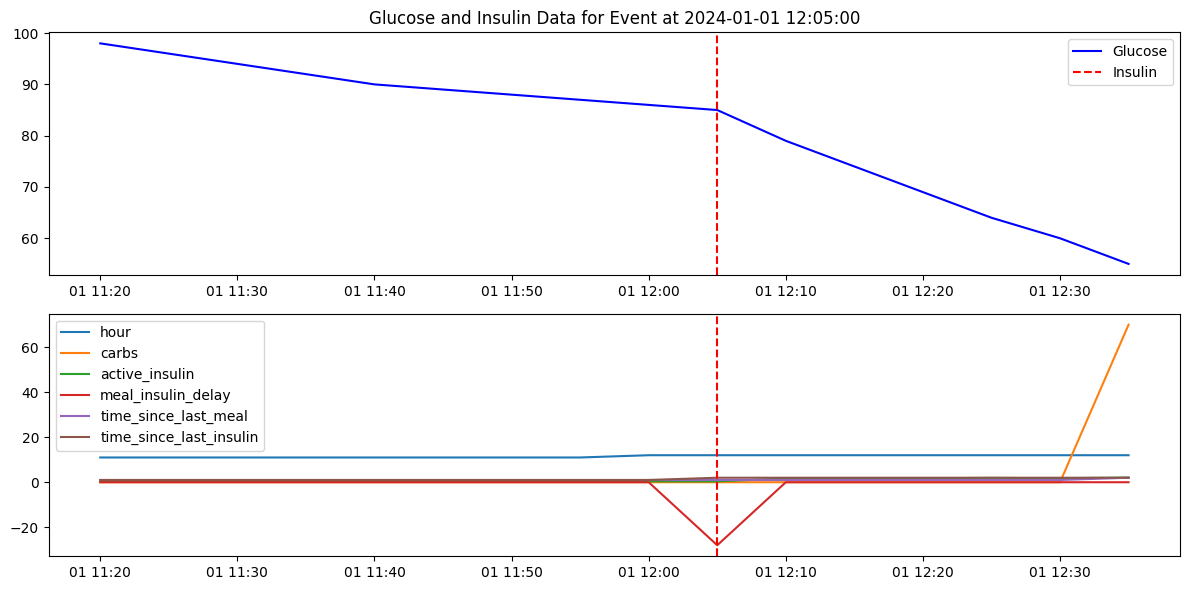

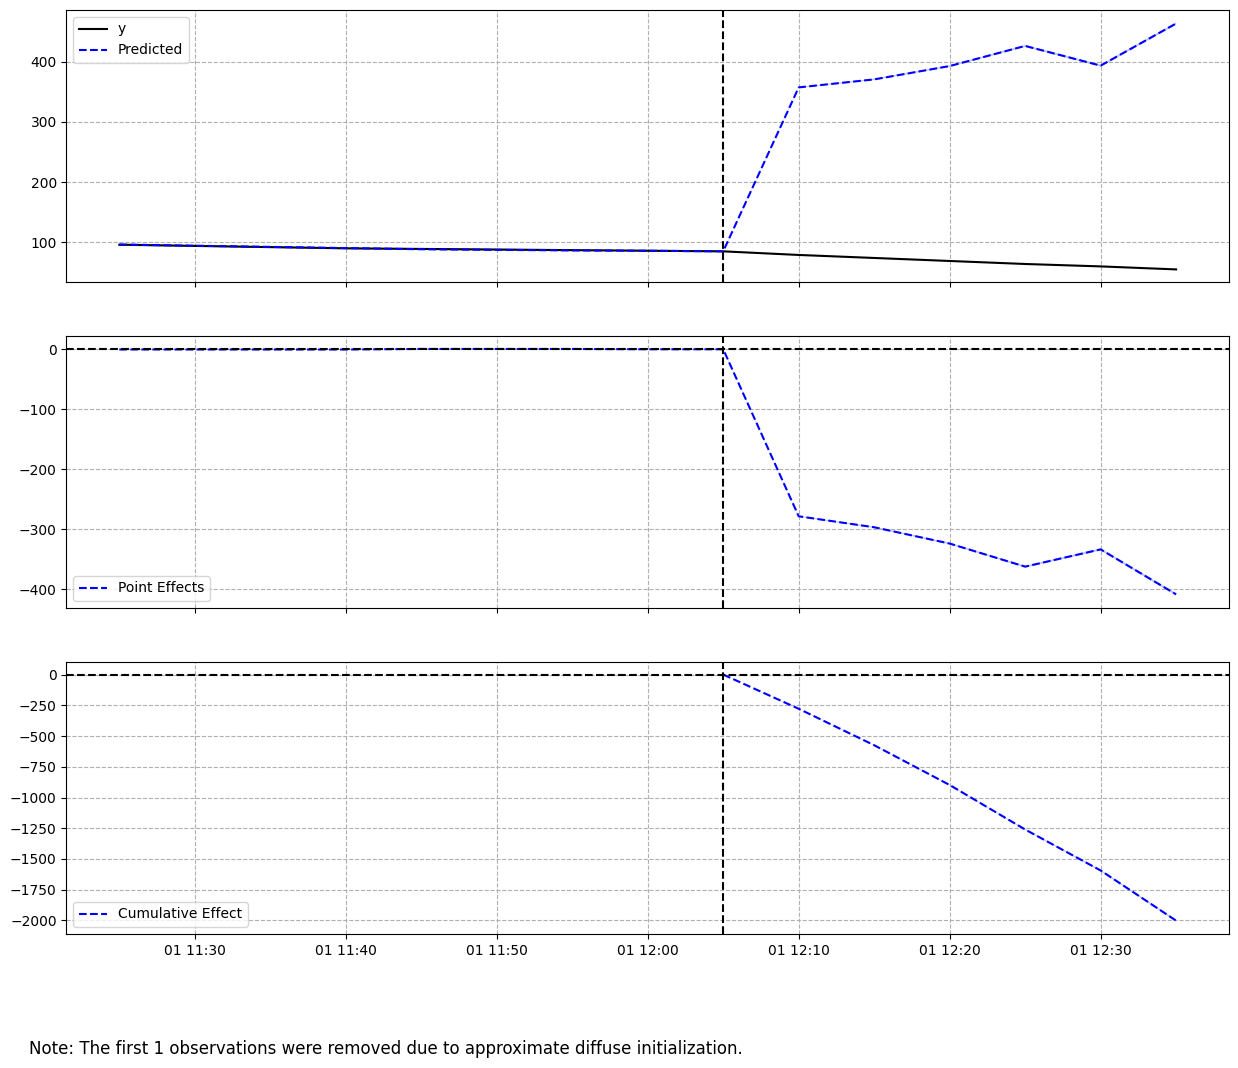

Success: CausalImpact analysis completed for event at 2024-01-01 12:05:00
Average effect: -333.65, Cumulative effect: -2001.91

Processing event 3/10 at 2024-01-01 19:00:00
Window data shape: (16, 13)
                     glucose  hour  carbs  insulin  active_insulin  \
2024-01-01 18:15:00       94    18      0      0.0        0.000000   
2024-01-01 18:20:00       94    18      0      0.0        0.000000   
2024-01-01 18:25:00       94    18      0      0.0        0.000000   
2024-01-01 18:30:00       94    18      0      0.0        0.000000   
2024-01-01 18:35:00       94    18      0      0.0        0.000000   
2024-01-01 18:40:00       94    18      0      0.0        0.000000   
2024-01-01 18:45:00       94    18      0      0.0        0.000000   
2024-01-01 18:50:00       94    18      0      0.0        0.000000   
2024-01-01 18:55:00       94    18      0      0.0        0.000000   
2024-01-01 19:00:00       95    19      0      6.1        0.000000   
2024-01-01 19:05:00       90 

/Users/jonathangong/Code/Repositories/causal_modeling/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


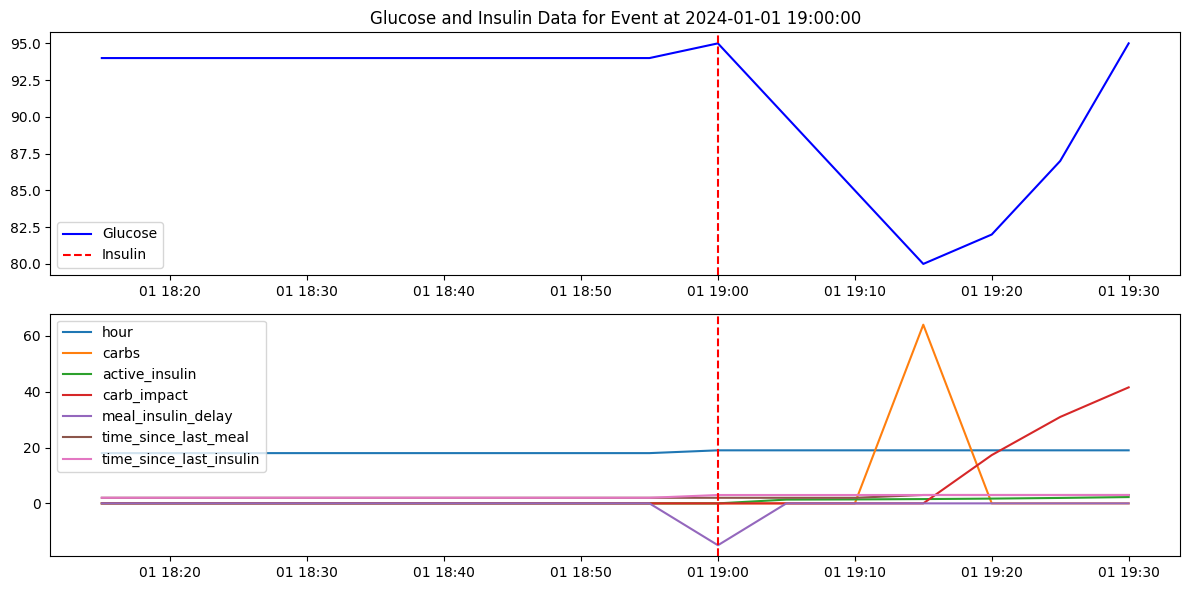

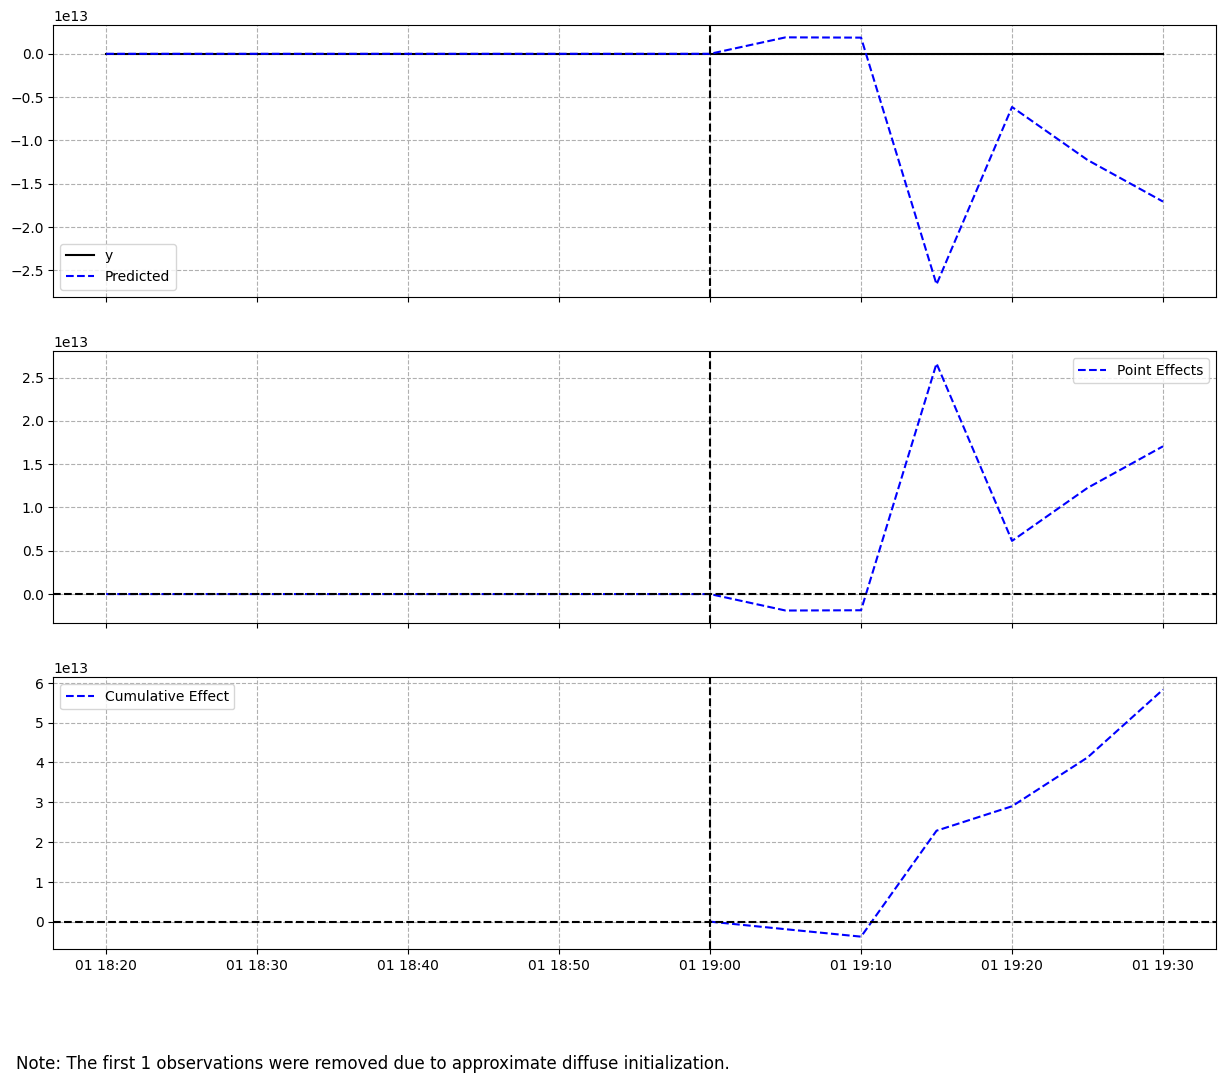

Success: CausalImpact analysis completed for event at 2024-01-01 19:00:00
Average effect: 9718088883047.94, Cumulative effect: 58308533298287.61

Processing event 4/10 at 2024-01-02 07:40:00
Window data shape: (16, 13)
                     glucose  hour  carbs  insulin  active_insulin  \
2024-01-02 06:55:00      112     6      0      0.0        0.000000   
2024-01-02 07:00:00      112     7      0      0.0        0.000000   
2024-01-02 07:05:00      112     7      0      0.0        0.000000   
2024-01-02 07:10:00      112     7      0      0.0        0.000000   
2024-01-02 07:15:00      112     7      0      0.0        0.000000   
2024-01-02 07:20:00      112     7      0      0.0        0.000000   
2024-01-02 07:25:00      112     7      0      0.0        0.000000   
2024-01-02 07:30:00      112     7      0      0.0        0.000000   
2024-01-02 07:35:00      112     7      0      0.0        0.000000   
2024-01-02 07:40:00      112     7      0      6.1        0.000000   
2024-01-02 

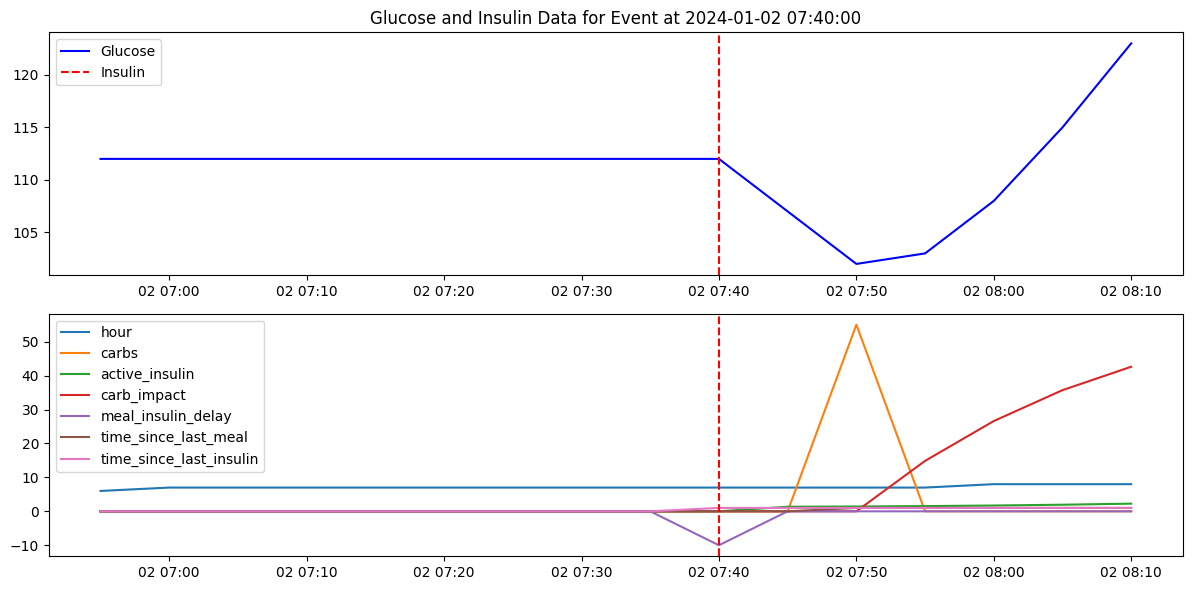

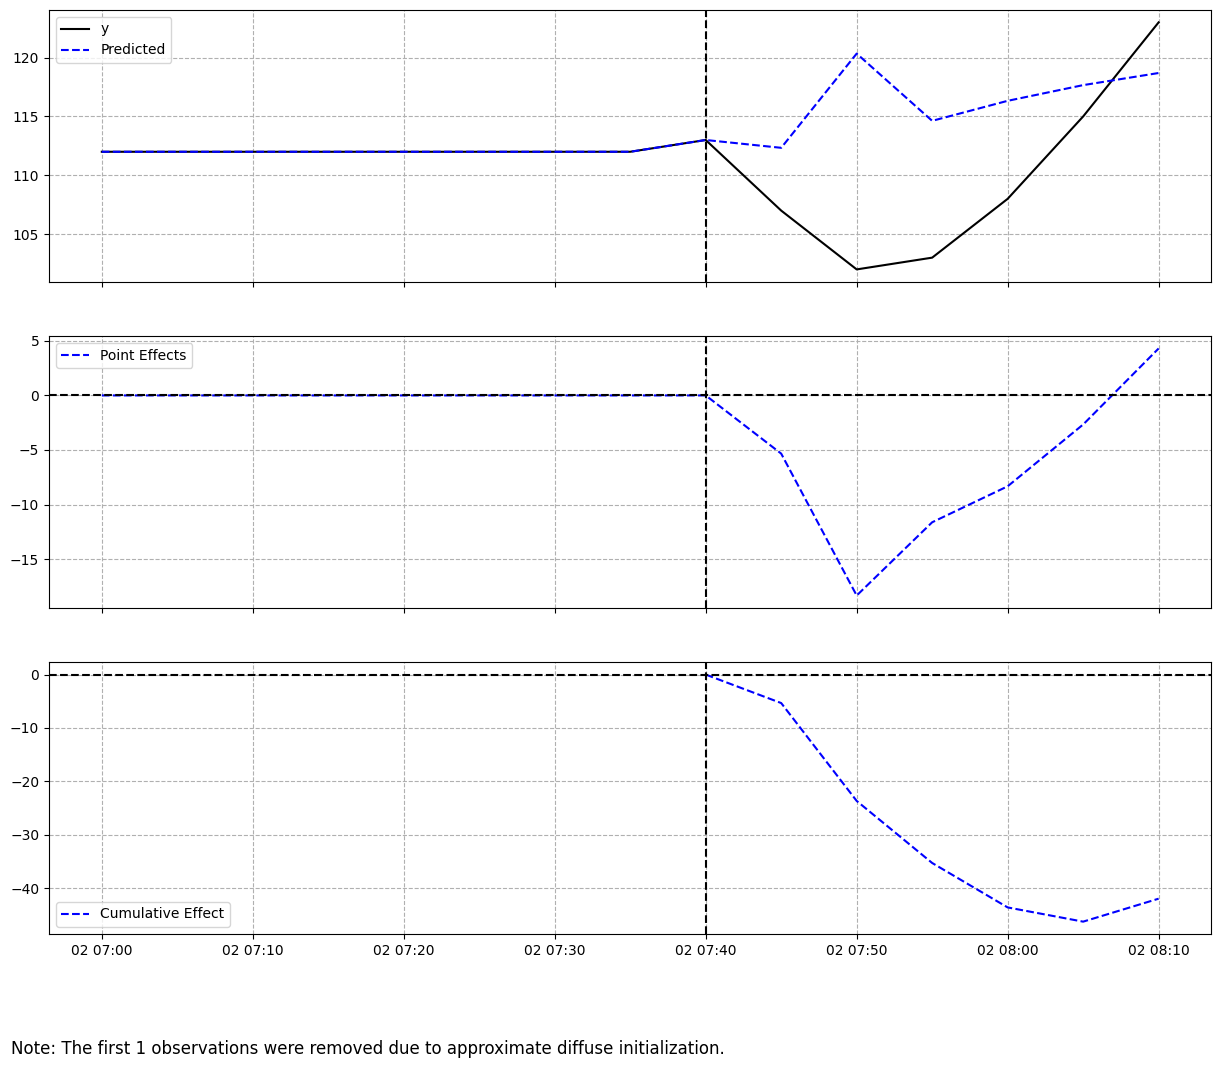

Success: CausalImpact analysis completed for event at 2024-01-02 07:40:00
Average effect: -7.00, Cumulative effect: -42.00

Processing event 5/10 at 2024-01-02 12:45:00
Window data shape: (16, 13)
                     glucose  hour  carbs  insulin  active_insulin  \
2024-01-02 12:00:00       84    12      0      0.0        0.512827   
2024-01-02 12:05:00       83    12      0      0.0        0.504351   
2024-01-02 12:10:00       82    12      0      0.0        0.496015   
2024-01-02 12:15:00       81    12      0      0.0        0.487817   
2024-01-02 12:20:00       81    12      0      0.0        0.479754   
2024-01-02 12:25:00       80    12      0      0.0        0.471824   
2024-01-02 12:30:00       80    12      0      0.0        0.464025   
2024-01-02 12:35:00       79    12      0      0.0        0.456356   
2024-01-02 12:40:00       80    12      0      0.0        0.000000   
2024-01-02 12:45:00       81    12      0      6.5        0.000000   
2024-01-02 12:50:00       77    1

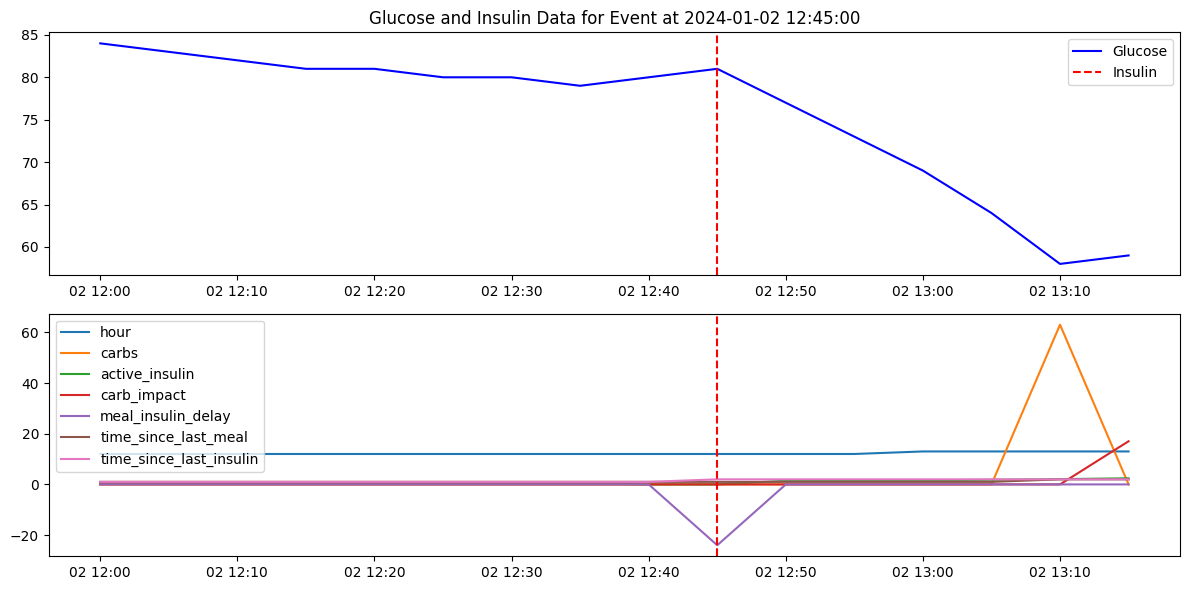

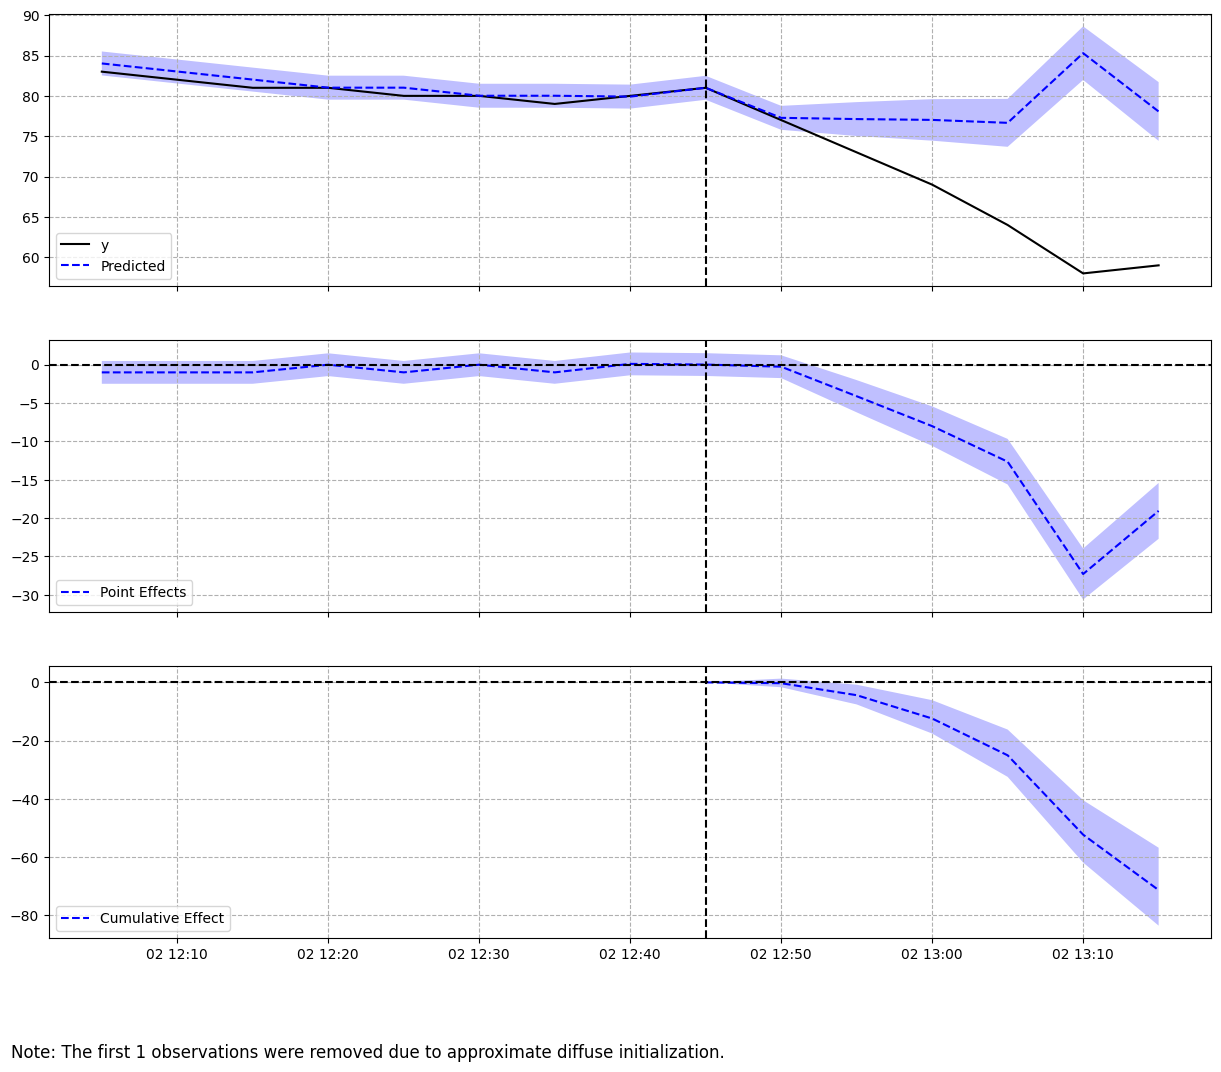

Success: CausalImpact analysis completed for event at 2024-01-02 12:45:00
Average effect: -11.91, Cumulative effect: -71.44

Processing event 6/10 at 2024-01-02 18:25:00
Window data shape: (16, 13)
                     glucose  hour  carbs  insulin  exercise  active_insulin  \
2024-01-02 17:40:00       82    17      0      0.0         0        0.486281   
2024-01-02 17:45:00       83    17      0      0.0         0        0.000000   
2024-01-02 17:50:00       84    17      0      0.0         0        0.000000   
2024-01-02 17:55:00       85    17      0      0.0         0        0.000000   
2024-01-02 18:00:00       86    18      0      0.0         1        0.000000   
2024-01-02 18:05:00       87    18      0      0.0         1        0.000000   
2024-01-02 18:10:00       88    18      0      0.0         1        0.000000   
2024-01-02 18:15:00       89    18      0      0.0         1        0.000000   
2024-01-02 18:20:00       90    18      0      0.0         1        0.000000   
20

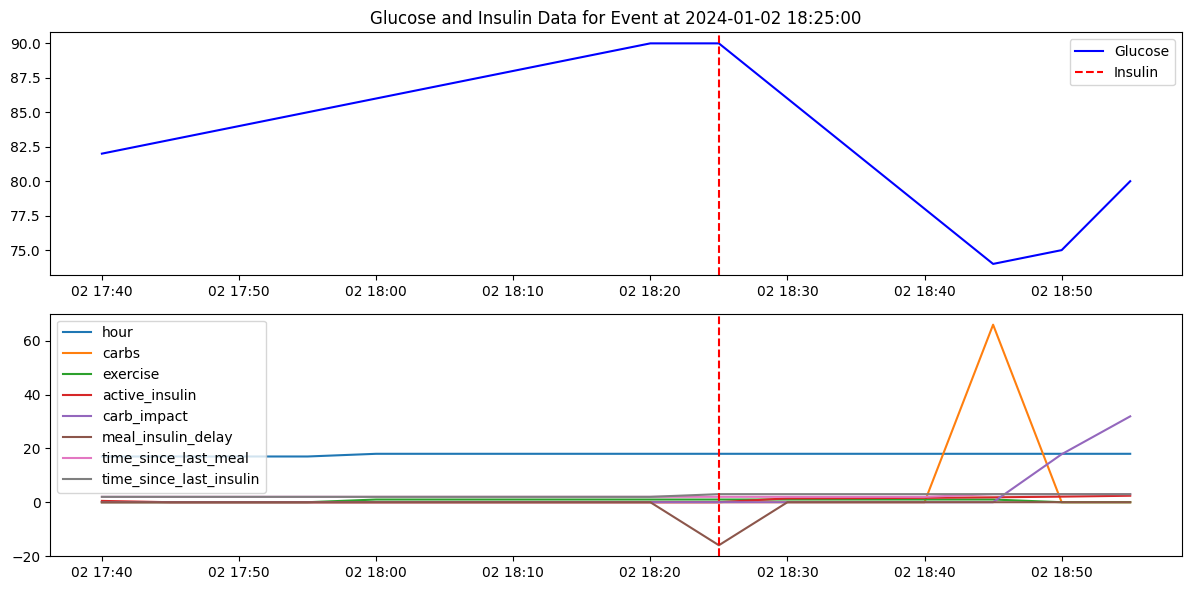

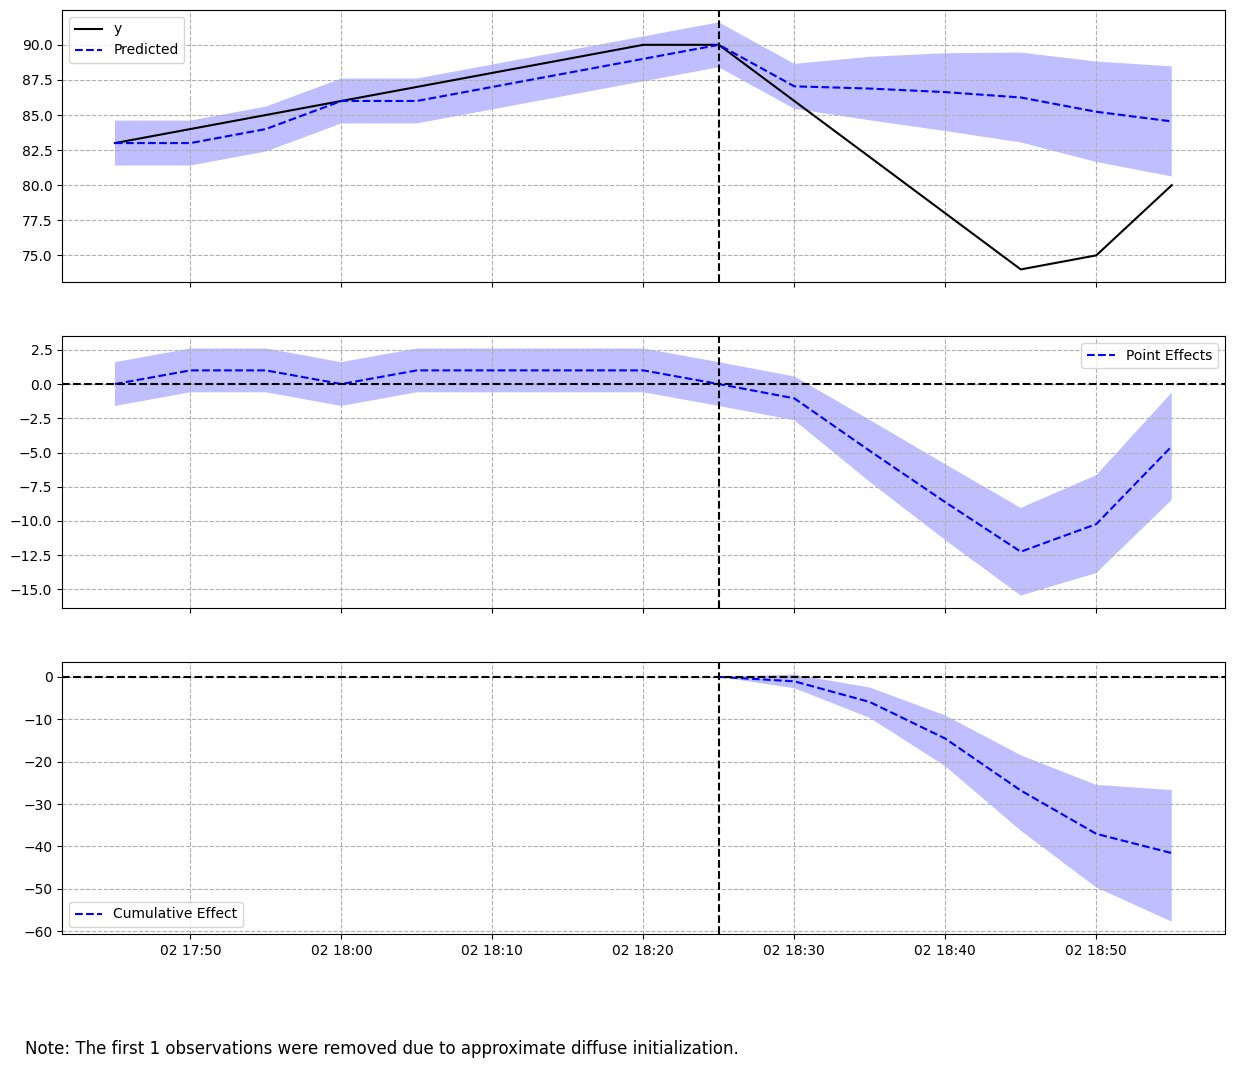

Success: CausalImpact analysis completed for event at 2024-01-02 18:25:00
Average effect: -6.93, Cumulative effect: -41.58

Processing event 7/10 at 2024-01-03 07:40:00
Window data shape: (16, 13)
                     glucose  hour  carbs  insulin  active_insulin  \
2024-01-03 06:55:00      111     6      0      0.0        0.000000   
2024-01-03 07:00:00      112     7      0      0.0        0.000000   
2024-01-03 07:05:00      112     7      0      0.0        0.000000   
2024-01-03 07:10:00      112     7      0      0.0        0.000000   
2024-01-03 07:15:00      113     7      0      0.0        0.000000   
2024-01-03 07:20:00      113     7      0      0.0        0.000000   
2024-01-03 07:25:00      113     7      0      0.0        0.000000   
2024-01-03 07:30:00      113     7      0      0.0        0.000000   
2024-01-03 07:35:00      113     7      0      0.0        0.000000   
2024-01-03 07:40:00      113     7      0      5.4        0.000000   
2024-01-03 07:45:00      108     

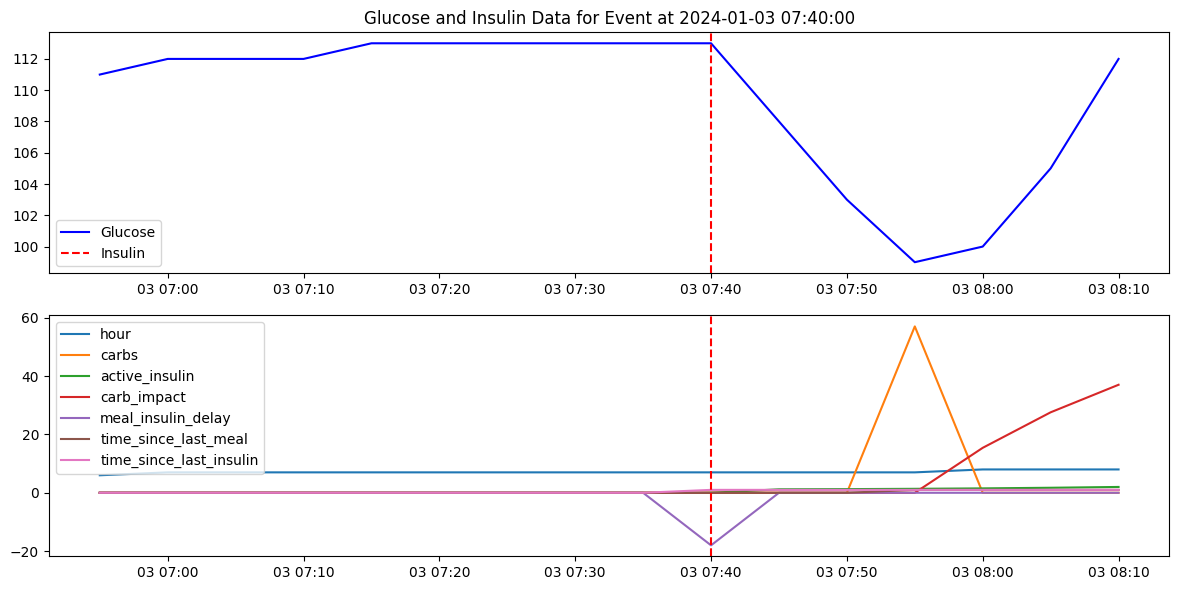

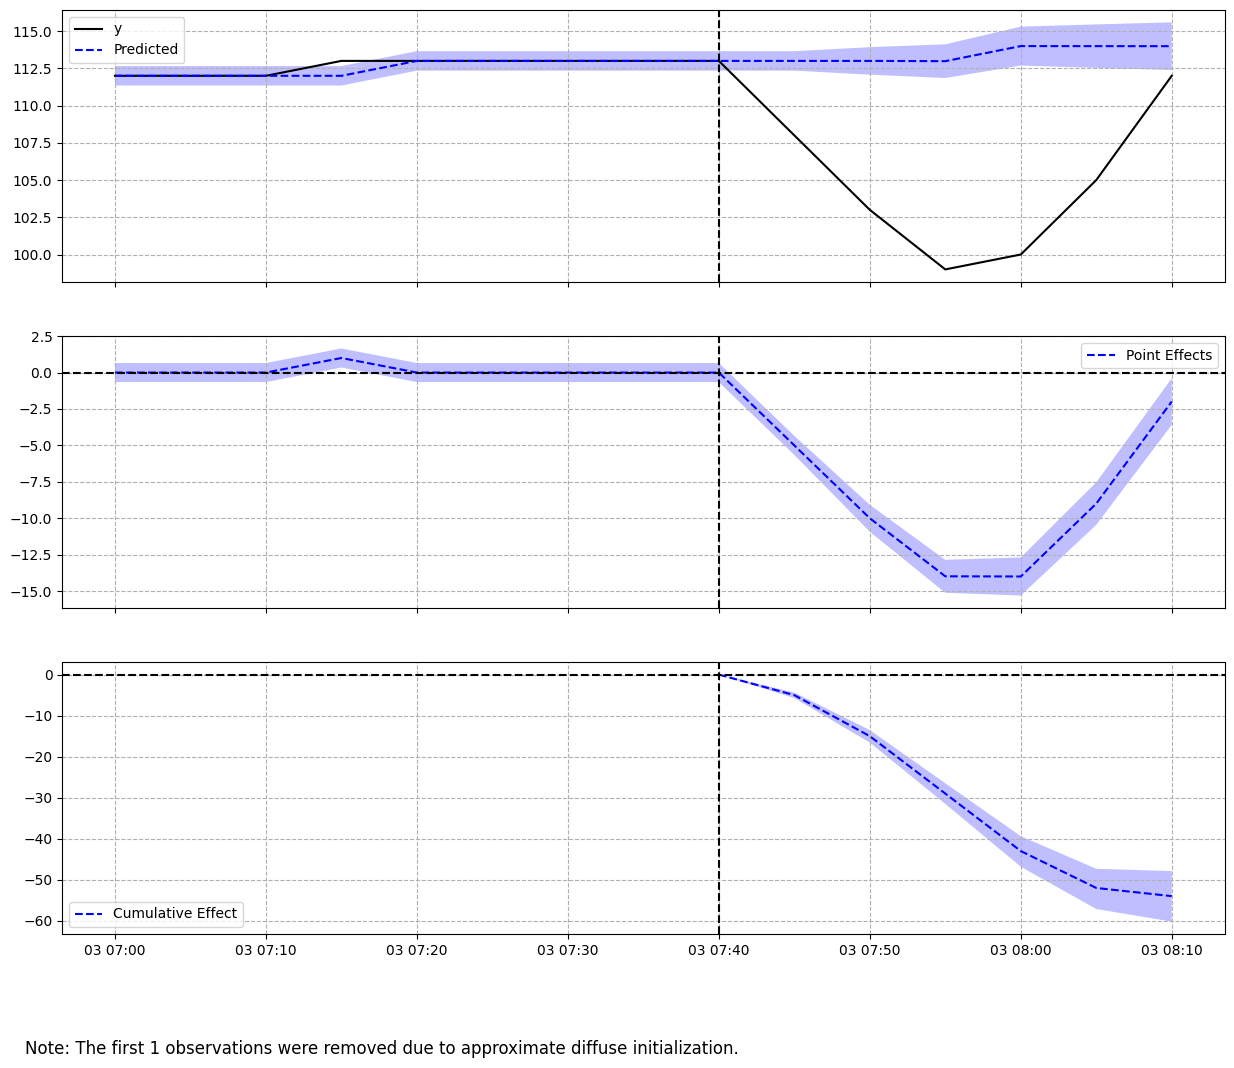

Success: CausalImpact analysis completed for event at 2024-01-03 07:40:00
Average effect: -8.99, Cumulative effect: -53.95

Processing event 8/10 at 2024-01-03 12:40:00
Window data shape: (16, 13)
                     glucose  hour  carbs  insulin  active_insulin  \
2024-01-03 11:55:00       93    11      0      0.0        0.461608   
2024-01-03 12:00:00       92    12      0      0.0        0.453978   
2024-01-03 12:05:00       91    12      0      0.0        0.446475   
2024-01-03 12:10:00       89    12      0      0.0        0.439095   
2024-01-03 12:15:00       88    12      0      0.0        0.431838   
2024-01-03 12:20:00       87    12      0      0.0        0.424700   
2024-01-03 12:25:00       86    12      0      0.0        0.417680   
2024-01-03 12:30:00       85    12      0      0.0        0.410777   
2024-01-03 12:35:00       84    12      0      0.0        0.403987   
2024-01-03 12:40:00       85    12      0      6.6        0.000000   
2024-01-03 12:45:00       80    1

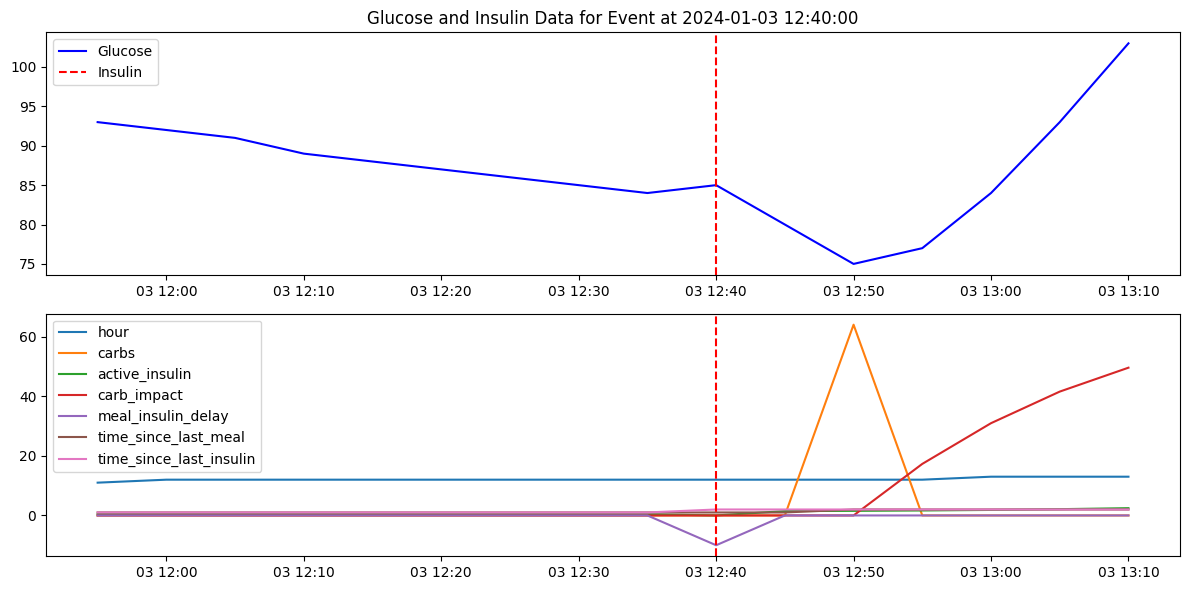

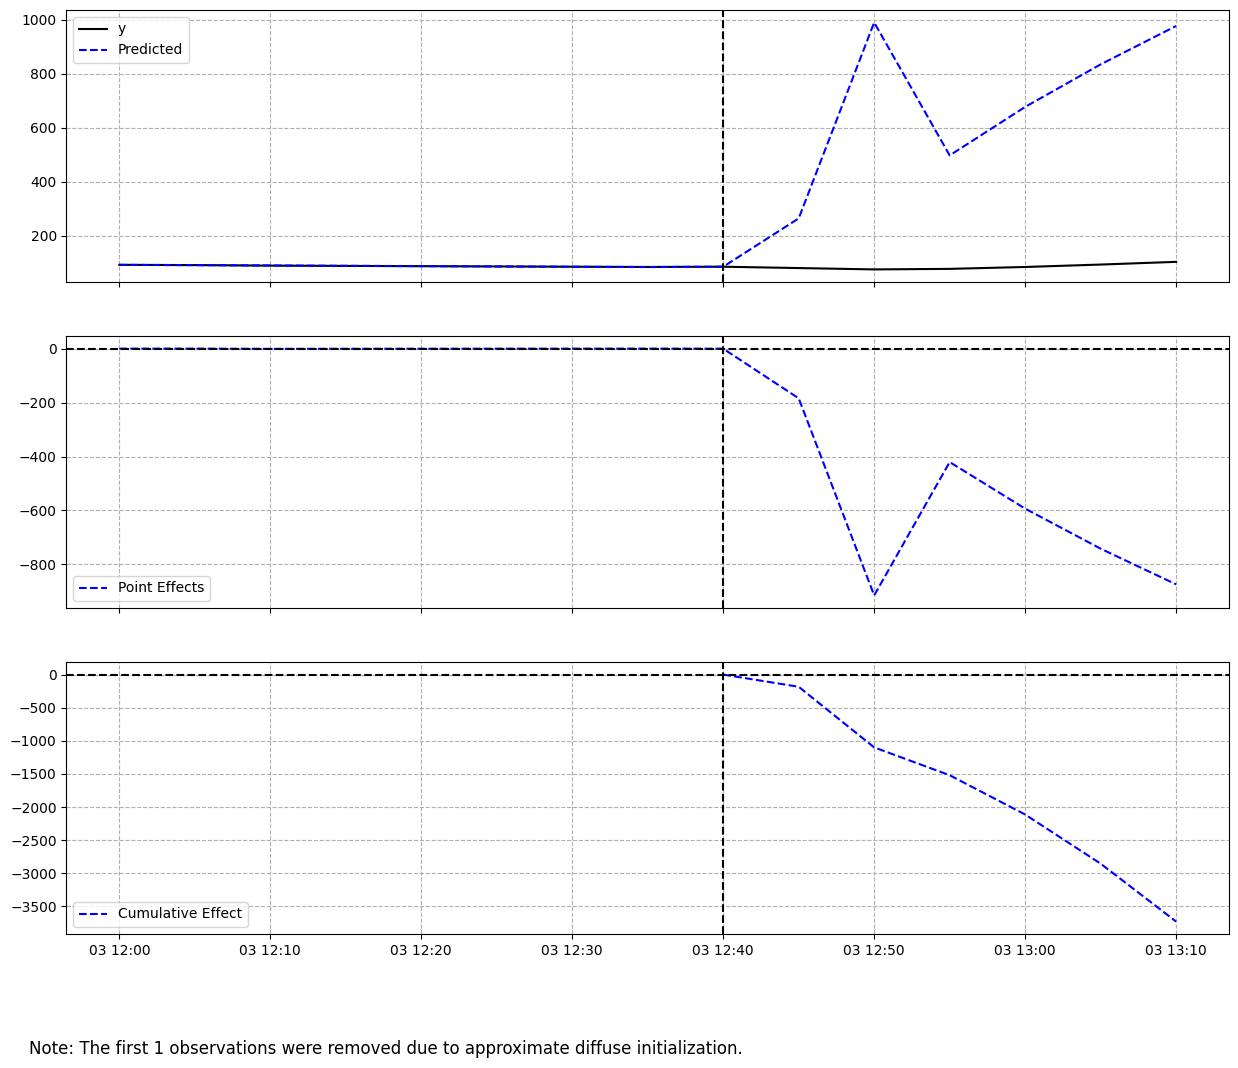

Success: CausalImpact analysis completed for event at 2024-01-03 12:40:00
Average effect: -621.33, Cumulative effect: -3728.01

Processing event 9/10 at 2024-01-03 18:55:00
Window data shape: (16, 13)
                     glucose  hour  carbs  insulin  exercise  active_insulin  \
2024-01-03 18:10:00       87    18      0      0.0         0        0.000000   
2024-01-03 18:15:00       88    18      0      0.0         0        0.000000   
2024-01-03 18:20:00       89    18      0      0.0         0        0.000000   
2024-01-03 18:25:00       90    18      0      0.0         0        0.000000   
2024-01-03 18:30:00       91    18      0      0.0         0        0.000000   
2024-01-03 18:35:00       91    18      0      0.0         0        0.000000   
2024-01-03 18:40:00       92    18      0      0.0         0        0.000000   
2024-01-03 18:45:00       92    18      0      0.0         0        0.000000   
2024-01-03 18:50:00       93    18      0      0.0         0        0.000000   

/Users/jonathangong/Code/Repositories/causal_modeling/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


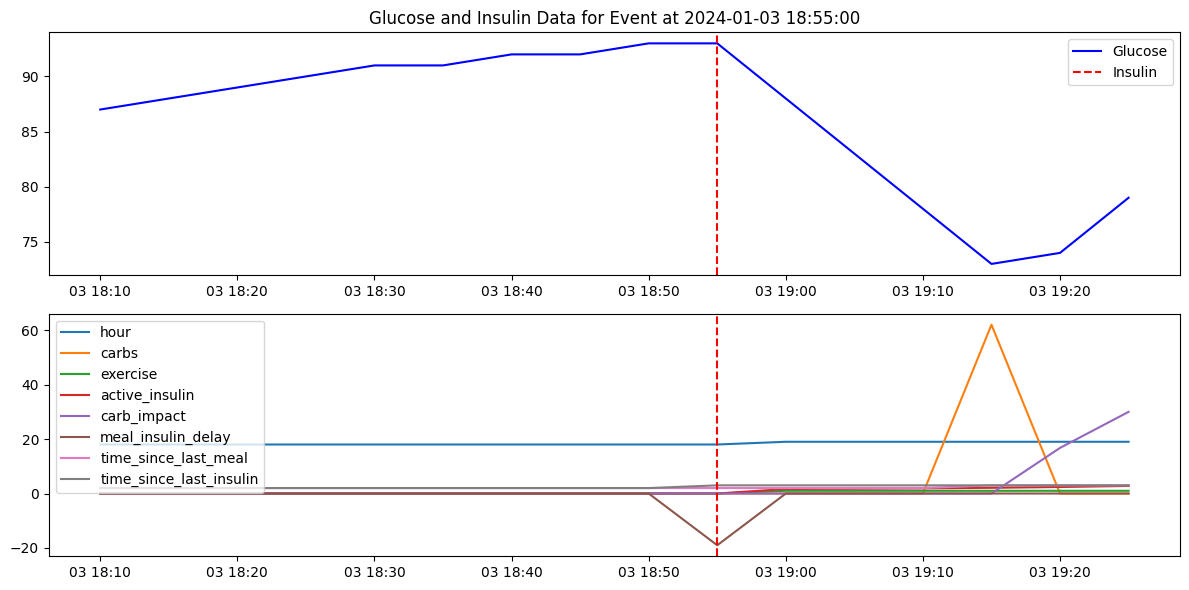

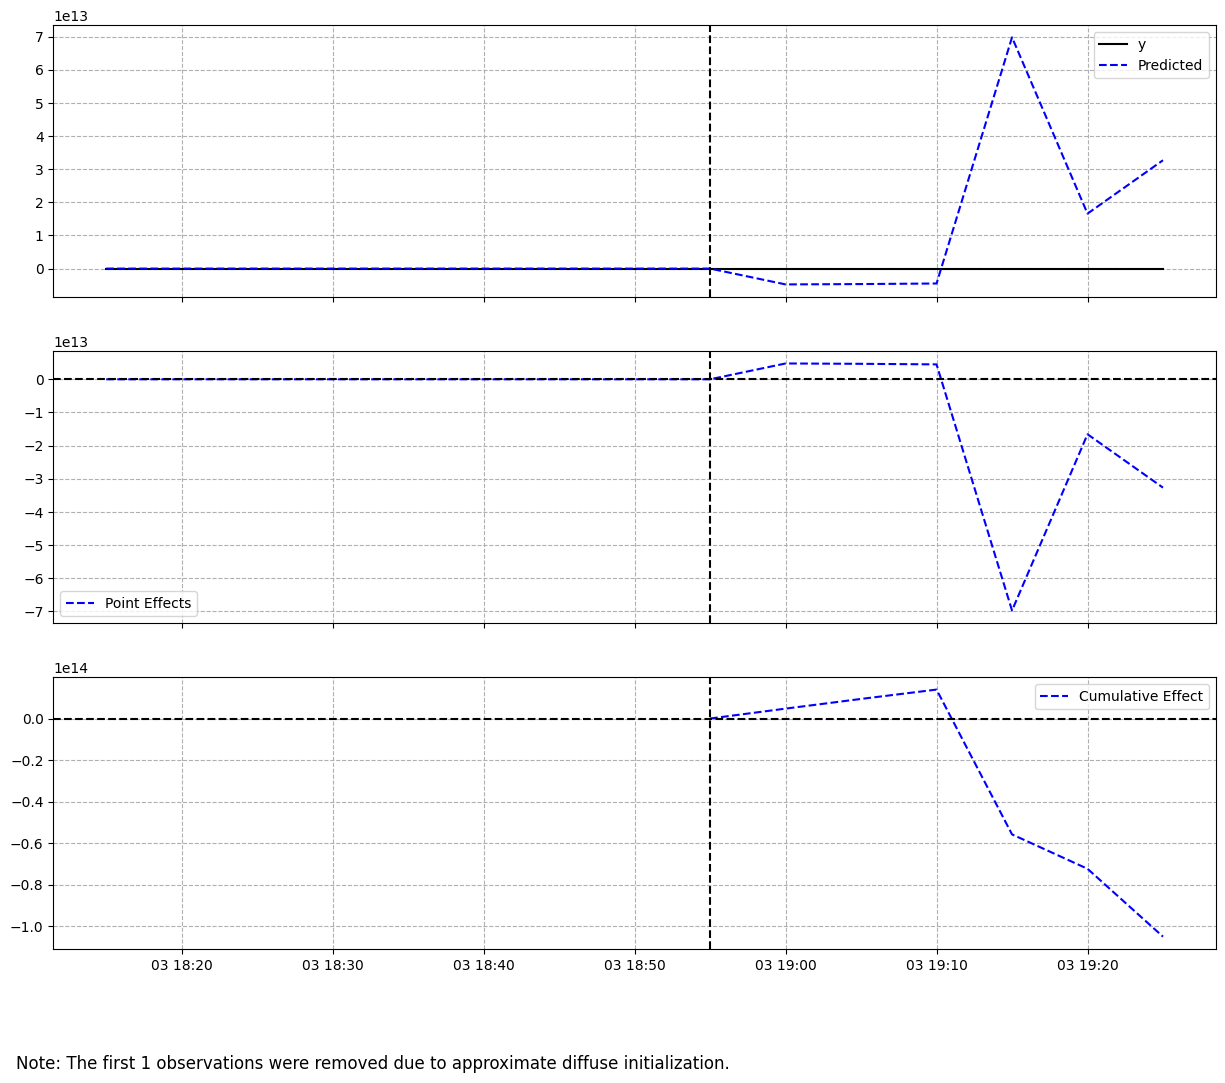

Success: CausalImpact analysis completed for event at 2024-01-03 18:55:00
Average effect: -17515932709253.08, Cumulative effect: -105095596255518.47

Processing event 10/10 at 2024-01-04 07:30:00
Window data shape: (16, 13)
                     glucose  hour  carbs  insulin  active_insulin  \
2024-01-04 06:45:00      112     6      0      0.0        0.000000   
2024-01-04 06:50:00      112     6      0      0.0        0.000000   
2024-01-04 06:55:00      112     6      0      0.0        0.000000   
2024-01-04 07:00:00      113     7      0      0.0        0.000000   
2024-01-04 07:05:00      113     7      0      0.0        0.000000   
2024-01-04 07:10:00      113     7      0      0.0        0.000000   
2024-01-04 07:15:00      114     7      0      0.0        0.000000   
2024-01-04 07:20:00      114     7      0      0.0        0.000000   
2024-01-04 07:25:00      114     7      0      0.0        0.000000   
2024-01-04 07:30:00      114     7      0      5.4        0.000000   
2024-0

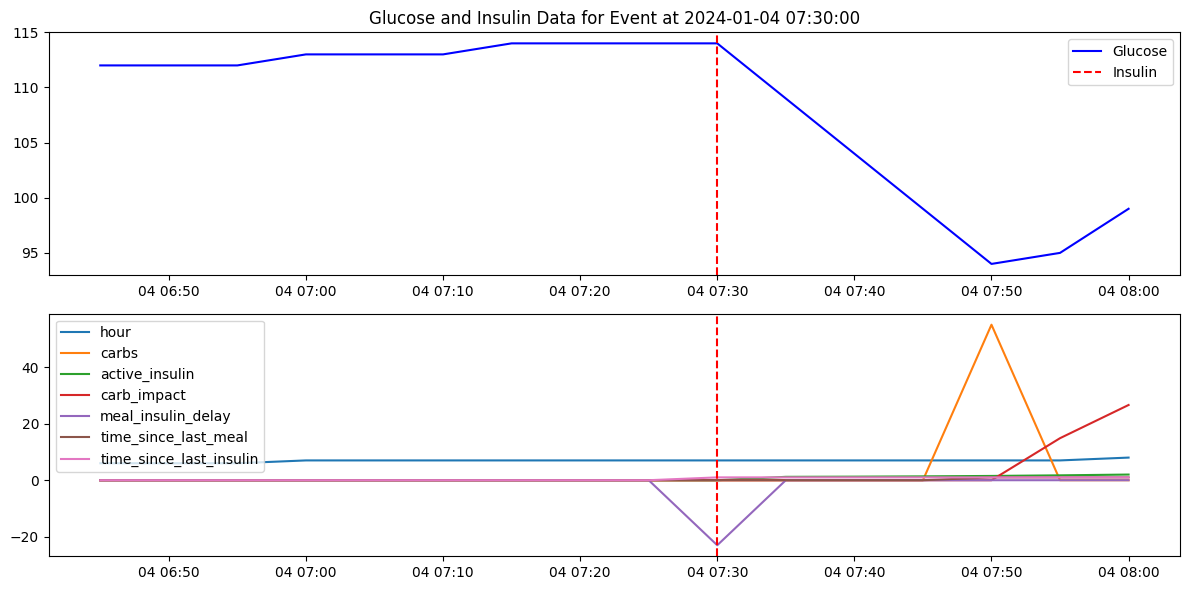

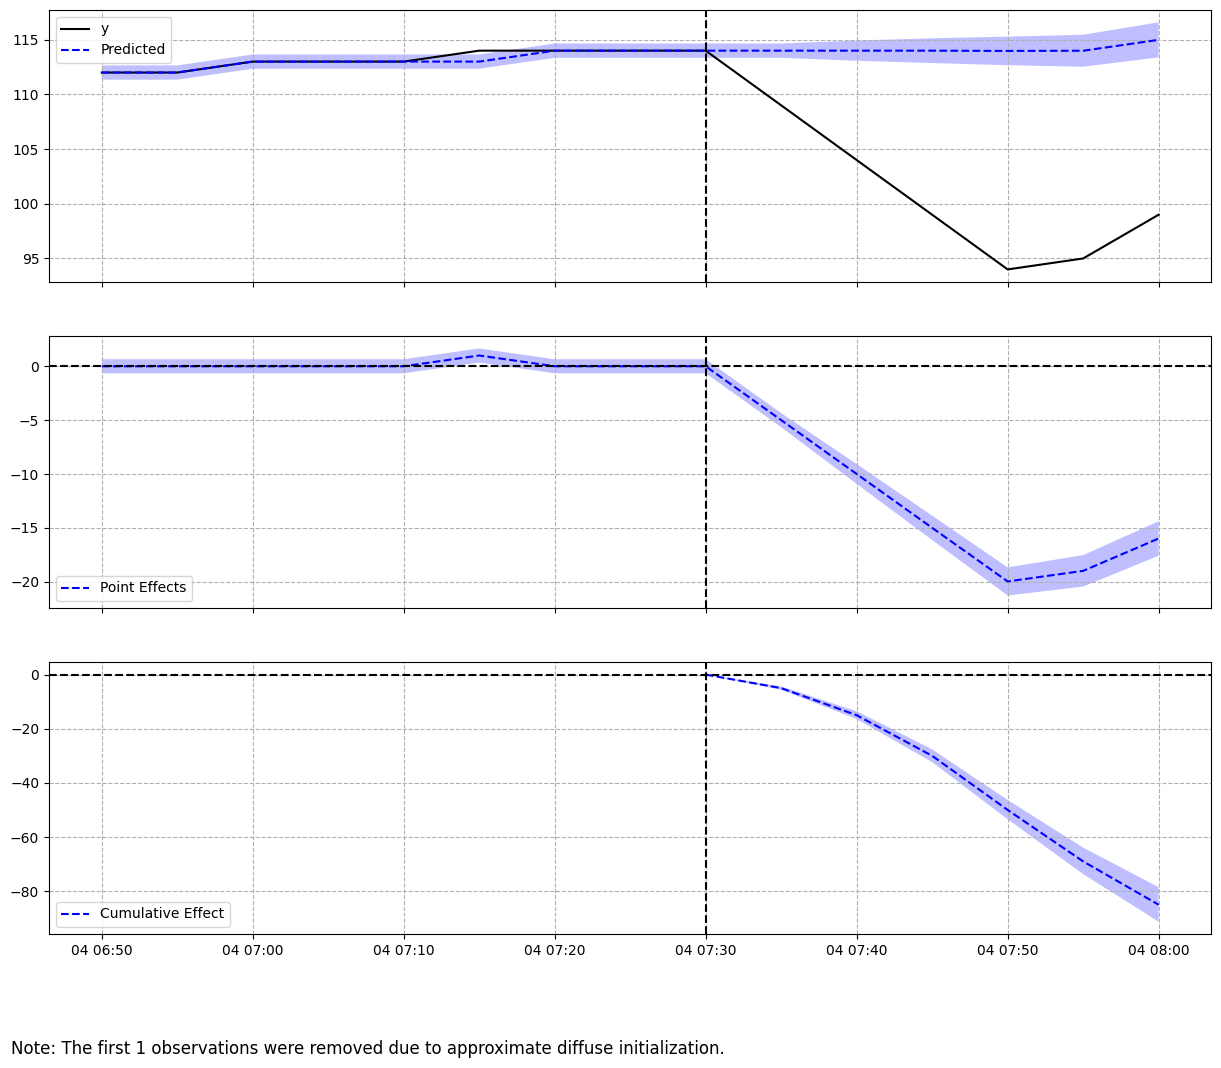

Success: CausalImpact analysis completed for event at 2024-01-04 07:30:00
Average effect: -14.16, Cumulative effect: -84.95


In [121]:
filtered_events = filtered_events[:10]

summary_list = []

if len(filtered_events) == 0:
    print("No interventions found.")
else:
    for event_idx, event in enumerate(filtered_events):
        print(f"\n{'='*50}")
        print(f"Processing event {event_idx+1}/{len(filtered_events)} at {event}")
        
        # Define the window around the event
        window_start = event - pd.Timedelta("45min")
        window_end = event + pd.Timedelta("30min")
        
        # Extract window data with consistent resampling
        try:
            window_data = data.loc[window_start:window_end].copy()
            
            # Forward fill missing values from resampling
            window_data = window_data.fillna(method='ffill')
                
            print(f"Window data shape: {window_data.shape}")
            
            # Define pre/post periods that align with actual data points
            # Find the closest data point to the event time
            closest_pre = window_data.index[window_data.index <= event].max()
            closest_post = window_data.index[window_data.index > event].min()
            
            if pd.isna(closest_pre) or pd.isna(closest_post):
                print(f"Skipping event at {event} - cannot establish pre/post boundaries")
                continue
                
            pre_period = [window_data.index.min(), closest_pre]
            post_period = [closest_post, window_data.index.max()]
            
            # Clean data by handling missing and infinite values
            ci_data = window_data.copy()
            ci_data = ci_data.replace([np.inf, -np.inf], np.nan)
            ci_data = ci_data.dropna()
            ci_data = ci_data.loc[:, ci_data.nunique() > 1]
            print(ci_data)
            print(f"Pre-period: {pre_period[0]} to {pre_period[1]}")
            print(f"Post-period: {post_period[0]} to {post_period[1]}")
            print(f"Data range: {ci_data.index.min()} to {ci_data.index.max()}")
            
            try:
                # Create full diagnostic plot to verify the data
                plt.figure(figsize=(12, 6))
                plt.subplot(211)
                plt.plot(ci_data.index, ci_data['glucose'], 'b-', label='Glucose')
                plt.axvline(x=event, color='r', linestyle='--', label='Insulin')
                plt.title(f'Glucose and Insulin Data for Event at {event}')
                plt.legend()
                
                plt.subplot(212)
                for col in ci_data.columns:
                    if col != 'glucose' and col != 'insulin':
                        plt.plot(ci_data.index, ci_data[col], label=col)
                plt.axvline(x=event, color='r', linestyle='--')
                plt.legend(loc='best')
                plt.tight_layout()
                plt.savefig(f"data_visual/event_{event_idx}_data.png")

                pre_data = ci_data.loc[pre_period[0]:closest_pre].copy()

                # For each column in the pre-period, if all values are the same, adjust the value at the boundary
                for col in pre_data.columns:
                    if pre_data[col].nunique() == 1:
                        constant_val = pre_data[col].iloc[0]
                        # Set the value at the row closest to the event to one more than the constant value
                        ci_data.loc[closest_pre, col] = constant_val + 1
                        
                impact = CausalImpact(ci_data, pre_period, post_period, prior_level_sd=None)
                
                # Extract summary information
                post_inferences = impact.inferences.loc[impact.inferences.index >= post_period[0]]
                avg_effect = post_inferences['point_effects'].mean()
                cum_effect = post_inferences['post_cum_effects'].iloc[-1]
                
                # Save summary plot
                impact.plot()               # Generate the plot using CausalImpact
                fig = plt.gcf()             # Get the current figure
                fig.savefig(f"data_causal/event_{event_idx}_impact.png")  # Save the figure
                plt.close(fig)              # Close the figure
                
                # Add to summary
                summary_list.append({
                    'event_time': event,
                    'window_start': window_start,
                    'window_end': window_end,
                    'insulin_dose': window_data['insulin'].sum(),
                    'avg_effect': avg_effect,
                    'cum_effect': cum_effect,
                    'pre_points': sum(window_data.index <= closest_pre),
                    'post_points': sum(window_data.index >= closest_post)
                })
                
                print(f"Success: CausalImpact analysis completed for event at {event}")
                print(f"Average effect: {avg_effect:.2f}, Cumulative effect: {cum_effect:.2f}")
                
            except Exception as e:
                print(f"Error running CausalImpact for event at {event}:")
                print(f"Error type: {type(e).__name__}")
                print(f"Error message: {str(e)}")
                
                print(f"Data shape: {ci_data.shape}")
                print(f"Column dtypes: {ci_data.dtypes}")
                print(f"Index type: {type(ci_data.index)}")
                
        except Exception as e:
            print(f"Error processing window data for event at {event}:")
            print(f"Error type: {type(e).__name__}")
            print(f"Error message: {str(e)}")


In [122]:
print(ci_data.isnull().sum())
print(np.isinf(ci_data).sum())

glucose                    0
hour                       0
carbs                      0
insulin                    0
active_insulin             0
carb_impact                0
meal_insulin_delay         0
time_since_last_meal       0
time_since_last_insulin    0
dtype: int64
glucose                    0
hour                       0
carbs                      0
insulin                    0
active_insulin             0
carb_impact                0
meal_insulin_delay         0
time_since_last_meal       0
time_since_last_insulin    0
dtype: int64


In [123]:
if summary_list:
    summary_df = pd.DataFrame(summary_list)
    print("\nCombined Summary of All Runs:")
    print(summary_df)


Combined Summary of All Runs:
           event_time        window_start          window_end  insulin_dose  \
0 2024-01-01 07:30:00 2024-01-01 06:45:00 2024-01-01 08:00:00           4.9   
1 2024-01-01 12:05:00 2024-01-01 11:20:00 2024-01-01 12:35:00           5.6   
2 2024-01-01 19:00:00 2024-01-01 18:15:00 2024-01-01 19:30:00           6.1   
3 2024-01-02 07:40:00 2024-01-02 06:55:00 2024-01-02 08:10:00           6.1   
4 2024-01-02 12:45:00 2024-01-02 12:00:00 2024-01-02 13:15:00           6.5   
5 2024-01-02 18:25:00 2024-01-02 17:40:00 2024-01-02 18:55:00           6.5   
6 2024-01-03 07:40:00 2024-01-03 06:55:00 2024-01-03 08:10:00           5.4   
7 2024-01-03 12:40:00 2024-01-03 11:55:00 2024-01-03 13:10:00           6.6   
8 2024-01-03 18:55:00 2024-01-03 18:10:00 2024-01-03 19:25:00           7.5   
9 2024-01-04 07:30:00 2024-01-04 06:45:00 2024-01-04 08:00:00           5.4   

     avg_effect    cum_effect  pre_points  post_points  
0  1.118582e+01  6.711495e+01          10 

## ITS with StatModel

ITS Regression Summary for event at 2024-01-01 07:30:00:

                            OLS Regression Results                            
Dep. Variable:                glucose   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     104.3
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           2.62e-07
Time:                        16:55:29   Log-Likelihood:                -26.013
No. Observations:                  13   AIC:                             60.03
Df Residuals:                       9   BIC:                             62.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/jonathangong/Code/Repositories/causal_modeling/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


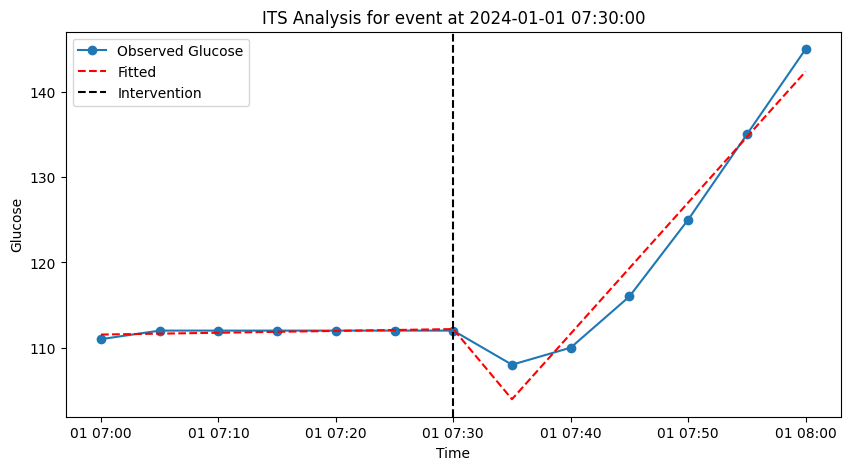

ITS Regression Summary for event at 2024-01-01 12:05:00:

                            OLS Regression Results                            
Dep. Variable:                glucose   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5969.
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           3.69e-15
Time:                        16:55:29   Log-Likelihood:                -1.4731
No. Observations:                  13   AIC:                             10.95
Df Residuals:                       9   BIC:                             13.21
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/jonathangong/Code/Repositories/causal_modeling/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


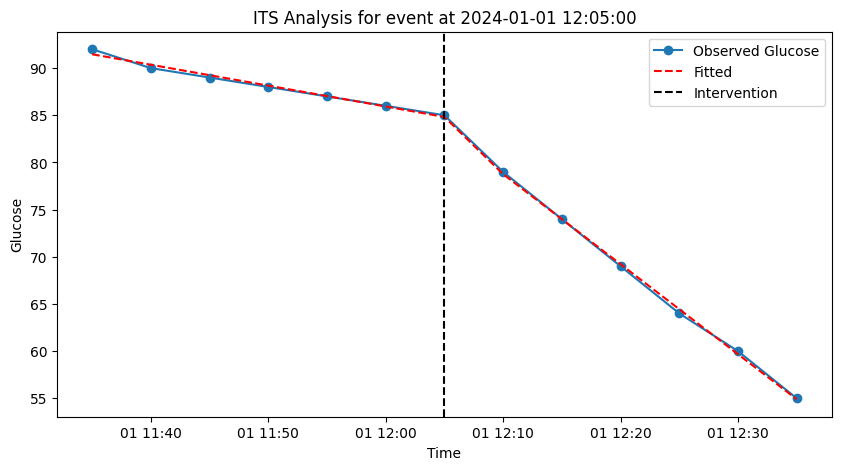

ITS Regression Summary for event at 2024-01-01 19:00:00:

                            OLS Regression Results                            
Dep. Variable:                glucose   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     4.564
Date:                Tue, 25 Feb 2025   Prob (F-statistic):             0.0331
Time:                        16:55:29   Log-Likelihood:                -33.633
No. Observations:                  13   AIC:                             75.27
Df Residuals:                       9   BIC:                             77.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/jonathangong/Code/Repositories/causal_modeling/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


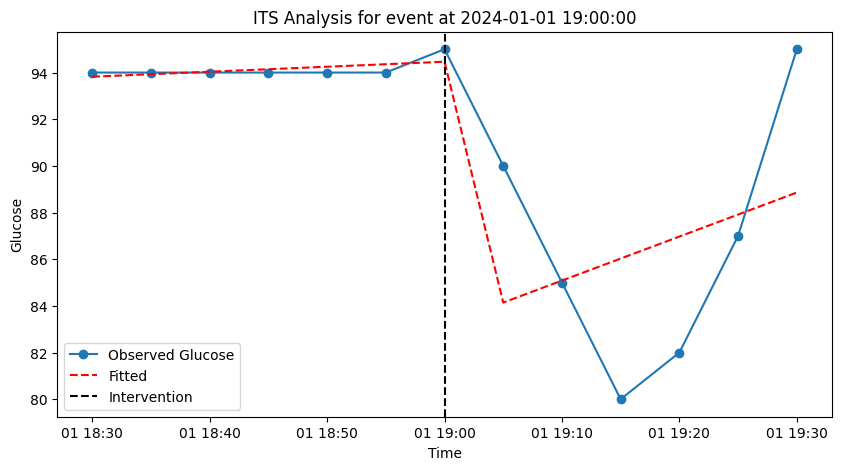

ITS Regression Summary for event at 2024-01-02 07:40:00:

                            OLS Regression Results                            
Dep. Variable:                glucose   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     7.141
Date:                Tue, 25 Feb 2025   Prob (F-statistic):            0.00938
Time:                        16:55:29   Log-Likelihood:                -31.687
No. Observations:                  13   AIC:                             71.37
Df Residuals:                       9   BIC:                             73.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/jonathangong/Code/Repositories/causal_modeling/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


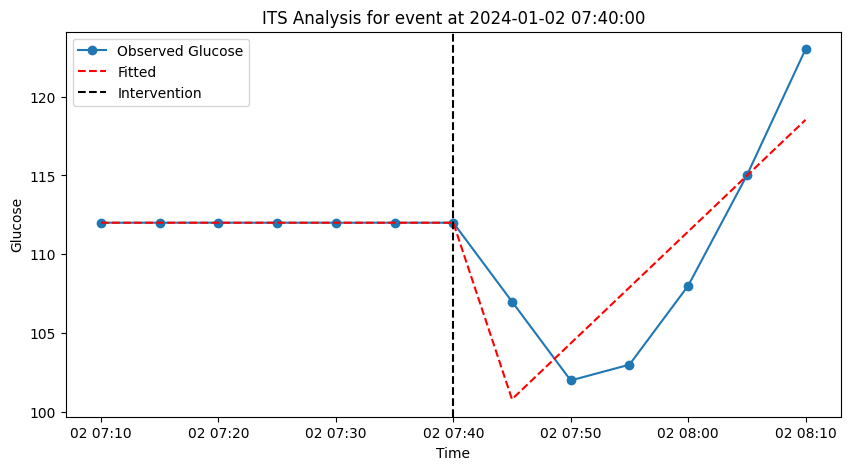

ITS Regression Summary for event at 2024-01-02 12:45:00:

                            OLS Regression Results                            
Dep. Variable:                glucose   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     160.5
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           3.94e-08
Time:                        16:55:29   Log-Likelihood:                -19.972
No. Observations:                  13   AIC:                             47.94
Df Residuals:                       9   BIC:                             50.20
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/jonathangong/Code/Repositories/causal_modeling/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


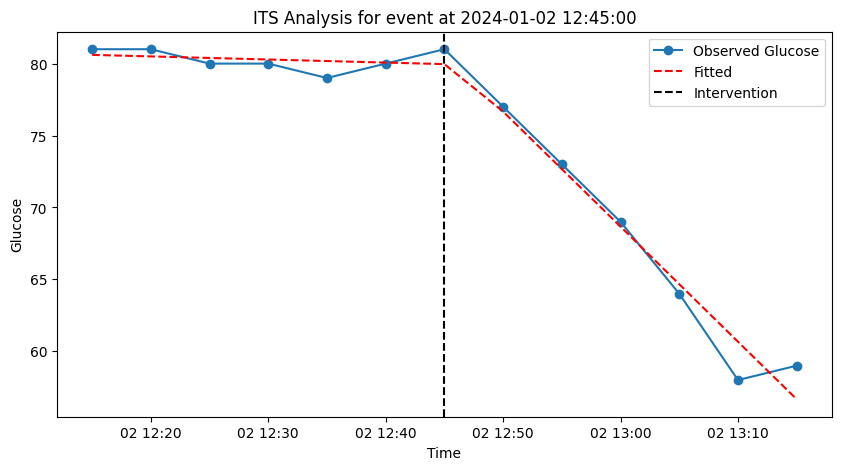

ITS Regression Summary for event at 2024-01-02 18:25:00:

                            OLS Regression Results                            
Dep. Variable:                glucose   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     15.97
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           0.000601
Time:                        16:55:29   Log-Likelihood:                -28.184
No. Observations:                  13   AIC:                             64.37
Df Residuals:                       9   BIC:                             66.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/jonathangong/Code/Repositories/causal_modeling/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


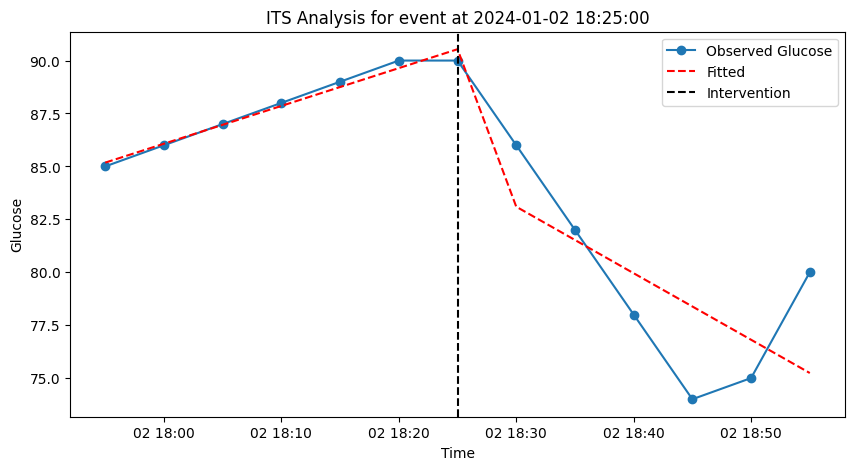

ITS Regression Summary for event at 2024-01-03 07:40:00:

                            OLS Regression Results                            
Dep. Variable:                glucose   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     6.353
Date:                Tue, 25 Feb 2025   Prob (F-statistic):             0.0133
Time:                        16:55:30   Log-Likelihood:                -32.422
No. Observations:                  13   AIC:                             72.84
Df Residuals:                       9   BIC:                             75.10
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/jonathangong/Code/Repositories/causal_modeling/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


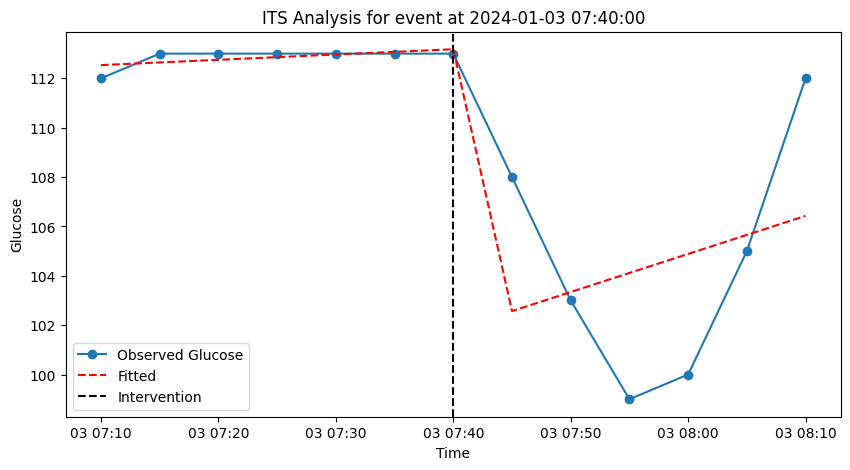

ITS Regression Summary for event at 2024-01-03 12:40:00:

                            OLS Regression Results                            
Dep. Variable:                glucose   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     10.14
Date:                Tue, 25 Feb 2025   Prob (F-statistic):            0.00303
Time:                        16:55:30   Log-Likelihood:                -33.752
No. Observations:                  13   AIC:                             75.50
Df Residuals:                       9   BIC:                             77.76
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/jonathangong/Code/Repositories/causal_modeling/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


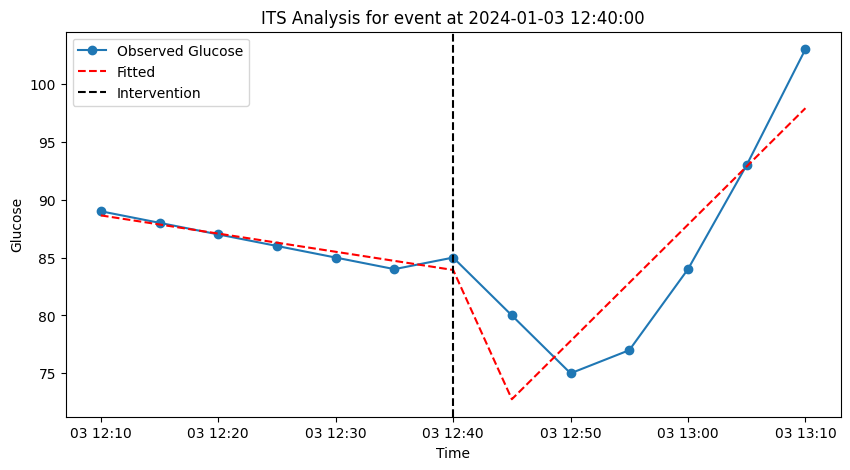

ITS Regression Summary for event at 2024-01-03 18:55:00:

                            OLS Regression Results                            
Dep. Variable:                glucose   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     24.16
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           0.000122
Time:                        16:55:30   Log-Likelihood:                -29.800
No. Observations:                  13   AIC:                             67.60
Df Residuals:                       9   BIC:                             69.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/jonathangong/Code/Repositories/causal_modeling/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


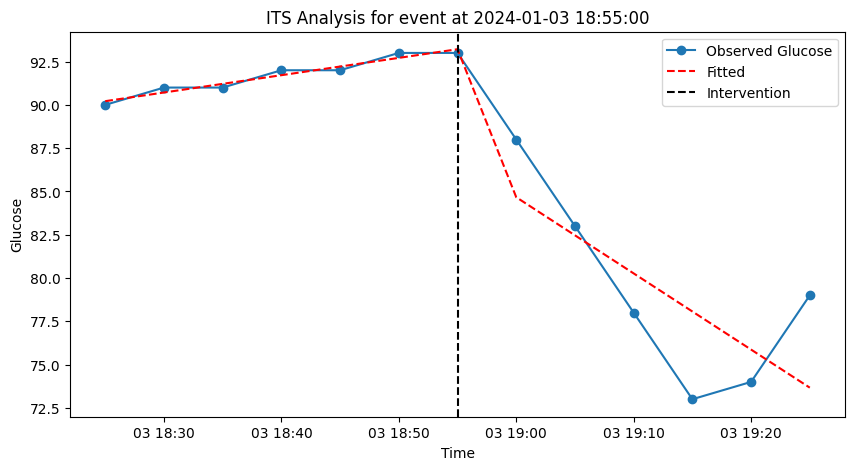

ITS Regression Summary for event at 2024-01-04 07:30:00:

                            OLS Regression Results                            
Dep. Variable:                glucose   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     32.27
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           3.81e-05
Time:                        16:55:30   Log-Likelihood:                -28.844
No. Observations:                  13   AIC:                             65.69
Df Residuals:                       9   BIC:                             67.95
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/Users/jonathangong/Code/Repositories/causal_modeling/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


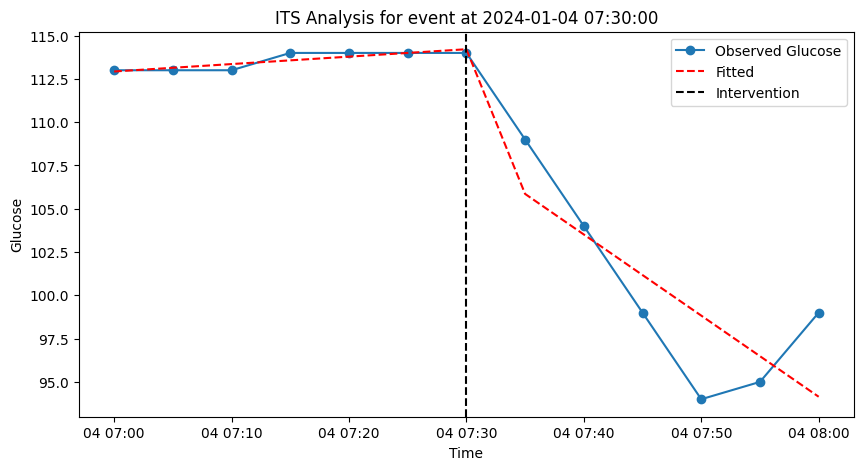


Combined Summary of All Runs:
           event_time        window_start          window_end  insulin_dose  \
0 2024-01-01 07:30:00 2024-01-01 07:00:00 2024-01-01 08:00:00           4.9   
1 2024-01-01 12:05:00 2024-01-01 11:35:00 2024-01-01 12:35:00           5.6   
2 2024-01-01 19:00:00 2024-01-01 18:30:00 2024-01-01 19:30:00           6.1   
3 2024-01-02 07:40:00 2024-01-02 07:10:00 2024-01-02 08:10:00           6.1   
4 2024-01-02 12:45:00 2024-01-02 12:15:00 2024-01-02 13:15:00           6.5   
5 2024-01-02 18:25:00 2024-01-02 17:55:00 2024-01-02 18:55:00           6.5   
6 2024-01-03 07:40:00 2024-01-03 07:10:00 2024-01-03 08:10:00           5.4   
7 2024-01-03 12:40:00 2024-01-03 12:10:00 2024-01-03 13:10:00           6.6   
8 2024-01-03 18:55:00 2024-01-03 18:25:00 2024-01-03 19:25:00           7.5   
9 2024-01-04 07:30:00 2024-01-04 07:00:00 2024-01-04 08:00:00           5.4   

   level_change  slope_change  
0    -61.383333      1.515714  
1     20.697619     -0.732857  
2  

In [124]:
summary_list = []

if len(filtered_events) == 0:
    print("No interventions found.")
else:
    for event in filtered_events:
        window_start = event - pd.Timedelta("30min")
        window_end   = event + pd.Timedelta("30min")
        
        window_data = data.loc[window_start:window_end].resample('5min').ffill()
        if window_data.empty or len(window_data) < 10:
            print(f"Skipping event at {event} due to insufficient data in the window.")
            continue
        
        window_data = window_data.reset_index()
        
        window_data['time'] = (window_data['index'] - window_data['index'].min()).dt.total_seconds() / 60.0

        window_data['post'] = (window_data['index'] > event).astype(int)
        
        window_data['time_post'] = window_data['time'] * window_data['post']
        
        if 'glucose' not in window_data.columns:
            print("Outcome variable 'glucose' not found in data; please adjust accordingly.")
            break
        
        # Fit the ITS regression model:
        #   outcome ~ time + post + time_post
        model = smf.ols("glucose ~ time + post + time_post", data=window_data).fit()
        print(f"ITS Regression Summary for event at {event}:\n")
        print(model.summary())
        
        # Calculate estimated immediate level change and change in slope:
        level_change = model.params['post']
        slope_change = model.params['time_post']
        
        summary_list.append({
            'event_time': event,
            'window_start': window_start,
            'window_end': window_end,
            'insulin_dose': window_data['insulin'].sum(),
            'level_change': level_change,
            'slope_change': slope_change
        })
        
        plt.figure(figsize=(10, 5))
        plt.plot(window_data['index'], window_data['glucose'], 'o-', label='Observed Glucose')
        # Predicted values
        window_data['fitted'] = model.fittedvalues
        plt.plot(window_data['index'], window_data['fitted'], 'r--', label='Fitted')
        plt.axvline(x=event, color='k', linestyle='--', label='Intervention')
        plt.xlabel('Time')
        plt.ylabel('Glucose')
        plt.title(f'ITS Analysis for event at {event}')
        plt.legend()
        plt.show()

summary_df = pd.DataFrame(summary_list)
print("\nCombined Summary of All Runs:")
print(summary_df)